# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>

AttributeError: 'Rectangle' object has no property 'normed'

AttributeError: 'Rectangle' object has no property 'normed'

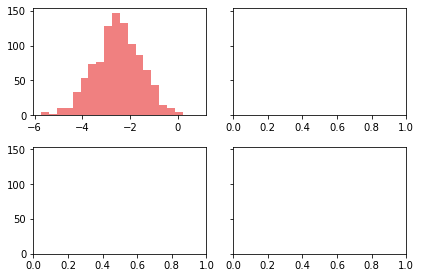

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True)
fig.tight_layout()

axs = [ax1, ax2, ax3, ax4]

x1 = np.random.normal(-2.5, 1, 1000)
x2 = np.random.gamma(2, 1.5, 1000)
x3 = np.random.exponential(2, 1000)
x4 = np.random.uniform(14,20, 1000)

axs[0].hist(x1, normed=True, bins=20, color='lightcoral')
axs[1].hist(x2, normed=True, bins=20, color='skyblue')
axs[2].hist(x3, normed=True, bins=20, color='gray')
axs[3].hist(x4, normed=True, bins=20, color='tan')
axs[0].set_title('Normal Distribution', fontsize=10)
axs[1].set_title('Gamma Distribution', fontsize=10)
axs[2].set_title('Exponential Distribution', fontsize=10)
axs[3].set_title('Uniform Distribution', fontsize=10)
    

<IPython.core.display.Javascript object>


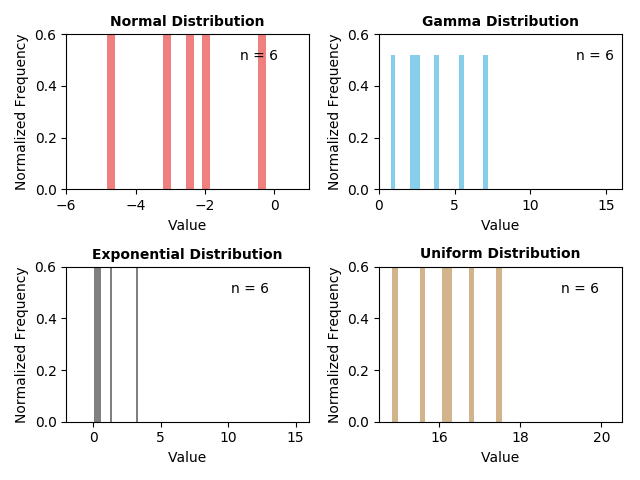

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True)
# fig.tight_layout()

axs = [ax1, ax2, ax3, ax4]

# Generate the different distrubutions
x1 = np.random.normal(-2.5, 1, 500)
x2 = np.random.gamma(2, 1.5, 500)
x3 = np.random.exponential(2, 1000)
x4 = np.random.uniform(14,20, 1000)
x = [x1, x2, x3, x4]

# Axis for all plots
a1 = [-6,1,0,0.6]
a2 = [0,16,0,0.6]
a3 = [-2,16,0,0.6]
a4 = [14.5,20.5,0,0.6]
aa = [a1, a2, a3, a4]

# NUmber of bins
# b1 = np.arange(-7,2,0.2)
# b2 = np.arange(-2,14,0.2)
# b3 = np.arange(-2,14,0.2)
# b4 = np.arange(12,22,0.2)
# b= [b1, b2, b3, b4]

#Generate the titles
titles = ['Normal Distribution','Gamma Distribution','Exponential Distribution','Uniform Distribution']

# Annotation positions
anno = [-1, 13, 10.2, 19]

# selecting colors
c = ['lightcoral', 'skyblue','gray','tan']

# Creating the annimation function
n = 100
def update(curr):
    if curr == n:
        a.event_source.stop()
        
    # Plotting histograms
    for i in range(len(x)):
        axs[i].cla()
        axs[i].hist(x[i][:curr], normed = True, bins=20, color = c[i])
        axs[i].axis(aa[i])
        axs[i].set_title(titles[i], fontdict={'fontweight':'bold', 'fontsize':10})
        axs[i].set_ylabel('Normalized Frequency')
        axs[i].set_xlabel('Value')
        axs[i].annotate('n = {}'.format(curr), [anno[i], 0.5])
    plt.tight_layout()
        
a = animation.FuncAnimation(fig, update, interval=100, frames=60)
# ani.save('sample.mp4', fps=60, dpi=200)